<a href="https://colab.research.google.com/github/atoshpulatov/Machine-Learning-Operationalization/blob/master/TOSHPULATOV_AZAMAT(Assingment_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# we need to download important libraries first
import pandas as pd
import numpy as np
import sklearn

In [ ]:
%ls

sample_data/  vertebral_column.csv


In [ ]:
# fetch dataset from pandas read_csv  function.
dataset = pd.read_csv('vertebral_column.csv')

In [ ]:
# we can check the dataset observations, columns and samples
dataset.head()

,pelvic_incidence,pelvic_tilt,lumbar_angle,sacral_slope,pelvic_radius,spondylolisthesis_grade,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1


In [ ]:
# if we need to know about more dataset we are going to deal. use describe() function
dataset.describe()

,pelvic_incidence,pelvic_tilt,lumbar_angle,sacral_slope,pelvic_radius,spondylolisthesis_grade,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496484,17.542903,51.930710,42.953871,117.920548,26.296742,0.677419
std,17.236109,10.008140,18.553766,13.422748,13.317629,37.558883,0.468220
min,26.150000,-6.550000,14.000000,13.370000,70.080000,-11.060000,0.000000
25%,46.432500,10.667500,37.000000,33.347500,110.710000,1.600000,0.000000
50%,58.690000,16.360000,49.565000,42.405000,118.265000,11.765000,1.000000
75%,72.880000,22.120000,63.000000,52.692500,125.467500,41.285000,1.000000
max,129.830000,49.430000,125.740000,121.430000,163.070000,418.540000,1.000000


In [ ]:
# we can know dataset's how many instance and how many features there are by using shape function 
dataset.shape

(310, 7)

In [ ]:
# we can also use ndim function to know the dimensions of our dataset we are going to deal 
dataset.ndim

2

In [ ]:
# we should drop "class" feature of the dataset as a target  
X = dataset.drop('class', axis = 'columns')
y = dataset['class']

In [ ]:
# we can know the shape of our predictors and target variables
print(X.shape)
print(y.shape)

(310, 6)
(310,)


In [ ]:
# now we need to split our dataset into training and test set bu using train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size =0.2, random_state = 42) # we are using 20% of dataset as testset and 80 % percent as training set

In [ ]:
# Now we can check out training and testing sets' shape as well as theirs labels' shape
print("This is train size:", X_train.shape,  "train label size:", y_train.shape)
print("This is test size:", X_test.shape,  "test label size:", y_test.shape)


This is train size: (248, 6) train label size: (248,)
This is test size: (62, 6) test label size: (62,)


## 1.LOGISTIC REGRESSION MODEL

In [ ]:
# we are going to fit Logistic Regression model to our dataset. we get it from sklearn.linear_model 
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()

In [ ]:
# fit our training set as well as its labels to logistic regression
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# we can know our linear model' intercept and coefficients
logistic_regression.intercept_, logistic_regression.coef_

(array([13.9667934]),
 array([[-0.01549455,  0.11257518, -0.02690973, -0.06936384, -0.10044234,
          0.16958415]]))

In [ ]:
# now we can predict out X_test by using accuracy_score from sklearn.metrics, check the accuracy of our model in unseen-dataset (X_test)
from sklearn.metrics import accuracy_score 
y_pred_lr= logistic_regression.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred_lr))

Accuracy 0.8548387096774194


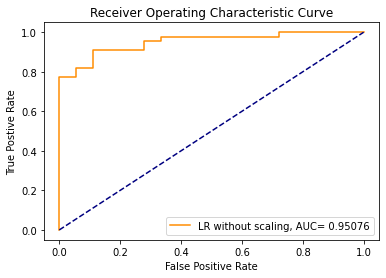

In [ ]:
# we can plot the our models performance by AUC-ROC curve which is plotted with TPR against the FPR
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_prob_lr = logistic_regression.predict_proba(X_test)[::, 1]
FPR, TPR , _ = metrics.roc_curve(y_test, y_pred_prob_lr)
AUC = metrics.roc_auc_score(y_test, y_pred_prob_lr)
lw = 1.5
plt.plot(FPR,TPR,  color="darkorange", lw=lw, label = "LR without scaling, AUC= %0.5f" % AUC)
plt.plot([0,1], [0,1], color="navy", lw=lw,linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Postive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc = 4)
plt.show()

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


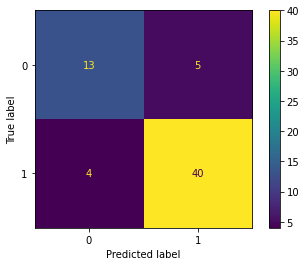

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logistic_regression, X_test, y_test)
plt.show()


THE SCALING WITH STANDARDIZATION

In [ ]:
# standardScaler function from skelear.preprocessing the mean of observed values is 0 and the standard deviation is 1 
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X_train) # we need to fit and transform normalization in the training dataset
X_train_std_scaled = std_scaler.transform(X_train)
X_test_std_scaled = std_scaler.transform(X_test) # in the test dataset we need only transform

In [ ]:
logistic_regression_scaled = LogisticRegression()
logistic_regression_scaled.fit(X_train_std_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred_sc_lr = logistic_regression_scaled.predict(X_test_std_scaled)  # predict() is used to predict the actual class 
print("Accuracy", accuracy_score(y_test, y_pred_sc_lr))  # data scaling improves linear regression model for sure

Accuracy 0.8709677419354839


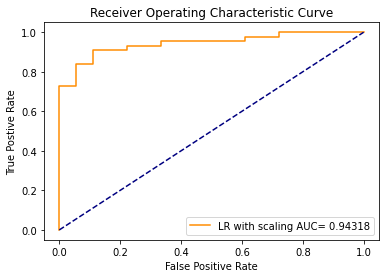

In [ ]:
# we can plot our model when the dataset is scaled by AUC-ROC curve
y_pred_prob_sc_lr= logistic_regression_scaled.predict_proba(X_test_std_scaled)[::, 1]  # predict_proba() is used to predict the class probabilities
FPR, TPR , _ = metrics.roc_curve(y_test, y_pred_prob_sc_lr)
AUC = metrics.roc_auc_score(y_test, y_pred_prob_sc_lr)
lw = 1.5
plt.plot(FPR,TPR,  color="darkorange", lw=lw, label = "LR with scaling AUC= %0.5f" % AUC)
plt.plot([0,1], [0,1], color="navy", lw=lw,linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Postive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc = 4)
plt.show()

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_sc_lr)

0.9090909090909091

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


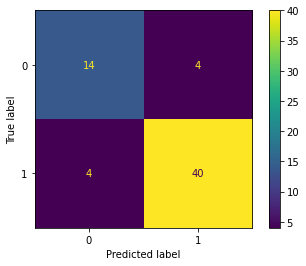

In [ ]:
plot_confusion_matrix(logistic_regression_scaled, X_test_std_scaled, y_test)
plt.show()

In [ ]:
# why scaling has not helped with AUC curve in logistic regression

## 2.K-NEAREST NEIGHBOR MODEL





In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
y_pred_knn = neigh.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred_knn))

Accuracy 0.8387096774193549


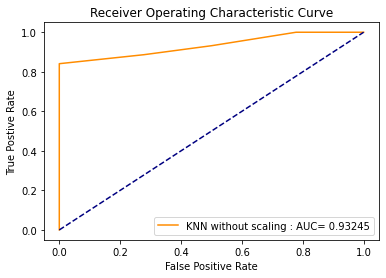

In [ ]:
y_pred_prob_knn = neigh.predict_proba(X_test)[::, 1]
FPR, TPR , _ = metrics.roc_curve(y_test, y_pred_prob_knn)
AUC = metrics.roc_auc_score(y_test, y_pred_prob_knn)
lw = 1.5
plt.plot(FPR,TPR,  color="darkorange", lw=lw, label = "KNN without scaling : AUC= %0.5f" % AUC)
plt.plot([0,1], [0,1], color="navy", lw=lw,linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Postive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc = 4)
plt.show()

In [ ]:
neigh_scaled = KNeighborsClassifier(n_neighbors=5)
neigh_scaled.fit(X_train_std_scaled,  y_train)


KNeighborsClassifier()

In [ ]:
y_pred_sc_knn= neigh_scaled.predict(X_test_std_scaled)
print("Accuracy", accuracy_score(y_test, y_pred_sc_knn))

Accuracy 0.8225806451612904


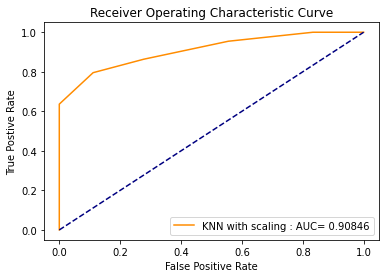

In [ ]:
y_pred_prob_sc_knn= neigh_scaled.predict_proba(X_test_std_scaled)[::, 1]
FPR, TPR , _ = metrics.roc_curve(y_test, y_pred_prob_sc_knn)
AUC = metrics.roc_auc_score(y_test, y_pred_prob_sc_knn)
lw = 1.5
plt.plot(FPR,TPR,  color="darkorange", lw=lw, label = "KNN with scaling : AUC= %0.5f" % AUC)
plt.plot([0,1], [0,1], color="navy", lw=lw,linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Postive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc = 4)
plt.show()

In [ ]:
#why scaling do not improve the K-Nearest Neighbor classifier

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_sc_knn)

0.8735632183908046

## 3.SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', random_state = 42 )
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred_svm= model.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred_svm))

Accuracy 0.8548387096774194


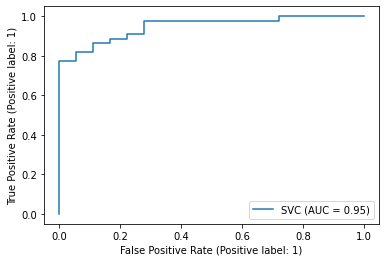

In [ ]:
from sklearn.metrics._plot.roc_curve import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()


In [ ]:
# the ROC Curve accuracy is much more higher than just accuracy of the model 

In [ ]:
from pandas.core.common import random_state
model_scl = SVC(kernel = 'linear', random_state = 42)
model_scl.fit(X_train_std_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred_sc_svm= model_scl.predict(X_test_std_scaled)
print("Accuracy", accuracy_score(y_test, y_pred_sc_svm))

Accuracy 0.8548387096774194


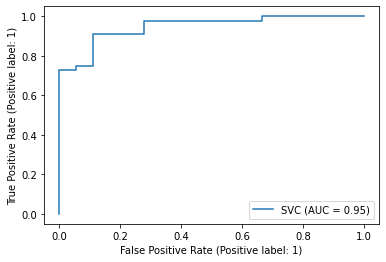

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(model_scl, X_test_std_scaled, y_test)
plt.show()

In [ ]:
# why scaling does not improve at all it is same result in svm model

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_sc_svm)

0.8988764044943819

## 4.DECISION TREE MODEL




In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
y_pred_dt= tree.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred_dt))


Accuracy 0.8548387096774194


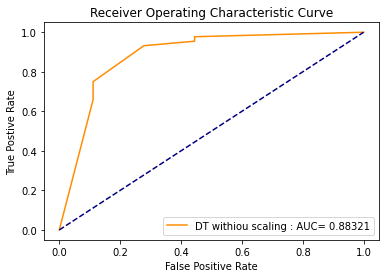

In [ ]:
y_pred_prob_tree= tree.predict_proba(X_test)[::, 1]
FPR, TPR , _ = metrics.roc_curve(y_test, y_pred_prob_tree)
AUC = metrics.roc_auc_score(y_test, y_pred_prob_tree)
lw = 1.5
plt.plot(FPR,TPR,  color="darkorange", lw=lw, label = "DT withiou scaling : AUC= %0.5f" % AUC)
plt.plot([0,1], [0,1], color="navy", lw=lw,linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Postive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc = 4)
plt.show()

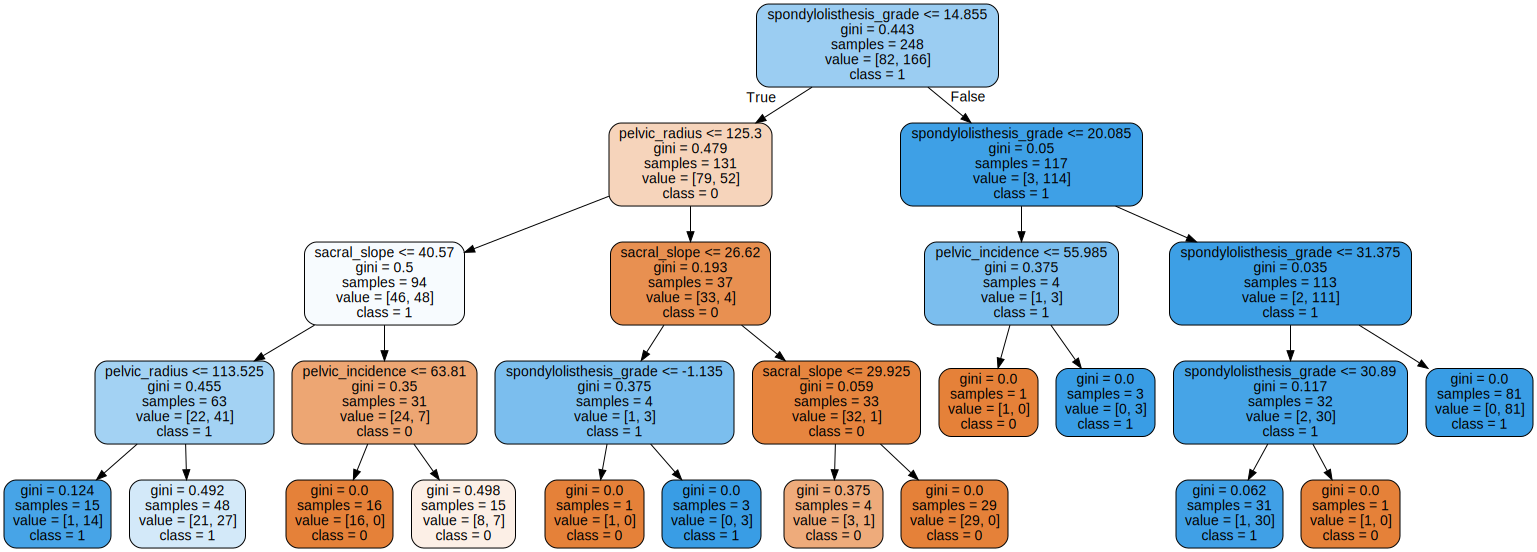

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", filled=True, rounded = True, feature_names = X.columns, class_names = ['0', '1'])
import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

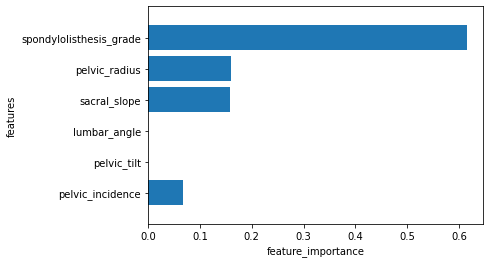

In [ ]:
def plot_feature_importance(model):
  n_features =X.shape[1]
  plt.barh(np.arange(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), X.columns)
  plt.xlabel("feature_importance")
  plt.ylabel("features")
  plt.ylim(-1, n_features)
plot_feature_importance(tree)           

Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the dataset

## 5.RANDOM FOREST MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 500,max_leaf_nodes = 16, n_jobs=-1, random_state = 42)
forest.fit(X_train , y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [ ]:
y_pred_rf= forest.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred_rf))

Accuracy 0.8064516129032258


In [ ]:
# why the accuracy of the randome forest is higher than decision tree and n_estimators optimal number

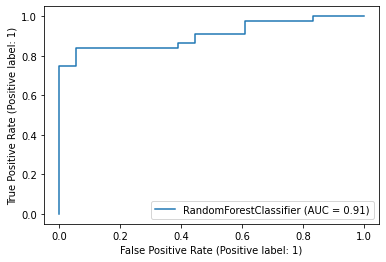

In [ ]:
rf_disp = RocCurveDisplay.from_estimator(forest, X_test, y_test)
plt.show()

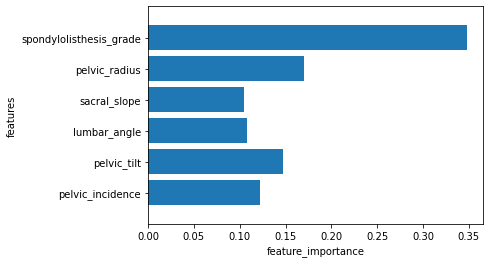

In [ ]:
# feature importance 
plot_feature_importance(forest)

scaling


In [ ]:
forest_sc = RandomForestClassifier(n_estimators = 100, random_state = 42)
forest_sc.fit(X_train_std_scaled , y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_s= forest_sc.predict(X_test_std_scaled)
print("Accuracy", accuracy_score(y_test, y_pred_s))

Accuracy 0.7741935483870968


In [ ]:
# Sclaing is not necessary for random forest

## CONCLUSION

In [ ]:
print("Logistic Regression Accuracy", accuracy_score(y_test, y_pred_lr))
print("K-Nearest Neighbor Accuracy", accuracy_score(y_test, y_pred_knn))
print("Support Vector Machine Accuracy", accuracy_score(y_test, y_pred_svm))
print("Decision Tree Accuracy", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy", accuracy_score(y_test, y_pred_rf))


Logistic Regression Accuracy 0.8548387096774194
K-Nearest Neighbor Accuracy 0.8387096774193549
Support Vector Machine Accuracy 0.8548387096774194
Decision Tree Accuracy 0.8709677419354839
Random Forest Accuracy 0.8064516129032258


In [ ]:
# among the 5 classifiers i think that Decision Tree has better performance than other models. Random Forest is overfitting a little bit,

## 6.NEURAL NETWORKS 


# Multi Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), activation = 'logistic', random_state=42, max_iter = 2000)
mlp.fit(X_train_std_scaled, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 10), max_iter=2000,
              random_state=42)

In [ ]:
y_pred_mlp= mlp.predict(X_test_std_scaled)
print("Accuracy", accuracy_score(y_test, y_pred_mlp))

Accuracy 0.8548387096774194


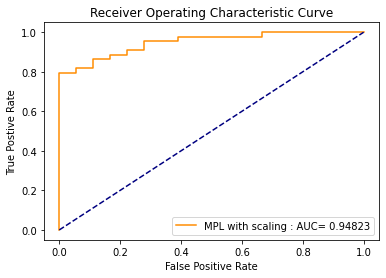

In [ ]:
y_pred_prob_mlp = mlp.predict_proba(X_test_std_scaled)[::, 1]
FPR, TPR , _ = metrics.roc_curve(y_test, y_pred_prob_mlp)
AUC = metrics.roc_auc_score(y_test, y_pred_prob_mlp)
lw = 1.5
plt.plot(FPR,TPR,  color="darkorange", lw=lw, label = "MPL with scaling : AUC= %0.5f" % AUC)
plt.plot([0,1], [0,1], color="navy", lw=lw,linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Postive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc = 4)
plt.show()